In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv('bankruptcy_Train.csv')
test_data = pd.read_csv('bankruptcy_Test_X.csv')
test_data.drop('ID',axis=1,inplace=True)

In [4]:
train_data.head(3)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.0704,0.0863,-0.3440,-0.1817,0.0074,-0.0183,-0.0062,-0.5032,1.7305,-0.0982,...,0.0092,0.0057,-0.0094,-0.0219,-0.0126,-0.2162,-0.0135,-0.2022,0.0454,0
1,-0.0315,0.0162,0.0644,-0.1325,0.0055,-0.0291,-0.0020,-0.3084,-0.7645,-0.0094,...,0.0099,0.0080,-0.0099,-0.0196,-0.0471,-0.2753,0.0087,-0.5894,-0.0428,0
2,-0.3714,0.0319,-0.6809,-0.2078,0.0059,-0.0161,-0.0592,-0.3636,-0.3933,-0.0293,...,0.0117,-0.0324,-0.0109,-0.0206,-0.0462,0.0234,-0.0022,-0.5064,-0.0410,1


In [6]:
train_data.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.009157,0.006348,0.010863,0.008542,0.008754,-0.003778,0.006704,-0.000856,-0.010930,-0.006547,...,-0.009801,-0.013509,0.009847,0.014134,0.001855,-0.010073,0.009683,0.001845,0.000212,0.021500
std,0.215420,0.094827,0.968869,1.289251,0.143395,0.619168,0.038732,1.079138,1.006380,0.119024,...,1.412866,1.330633,1.412864,1.405636,1.251921,1.056577,1.410930,1.162661,0.990925,0.145051
min,-5.317200,-0.170000,-12.170600,-0.381600,-1.111400,-22.442600,-0.399800,-1.039100,-1.296400,-3.300800,...,-117.531300,-118.282900,-0.024200,-4.816200,-0.048600,-0.413100,-0.022200,-0.743300,-0.051000,0.000000
25%,-0.079625,-0.055000,-0.516700,-0.192300,0.006800,-0.016000,-0.008000,-0.442525,-0.389500,-0.067000,...,0.009300,0.003200,-0.010800,-0.022700,-0.043400,-0.223400,-0.016800,-0.370700,-0.041500,0.000000
50%,-0.021300,-0.000050,0.005600,-0.118150,0.007300,-0.016000,0.003800,-0.261950,-0.311100,0.000200,...,0.009800,0.009800,-0.009900,-0.020400,-0.040000,-0.141200,-0.013700,-0.187750,-0.034400,0.000000
75%,0.076000,0.055100,0.602050,0.025650,0.007800,0.015800,0.023400,0.093750,0.131375,0.069500,...,0.010700,0.019600,-0.009400,-0.014400,-0.032100,-0.008750,-0.009500,0.119050,-0.021000,0.000000
max,2.337300,2.614600,3.332500,97.311600,11.556200,54.566700,0.410300,47.504500,62.936400,0.468300,...,0.022900,7.546400,117.517700,128.352800,117.341100,59.139200,136.430900,62.527200,90.774700,1.000000


In [46]:
test_data.head(3)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.0481,0.0221,0.5212,-0.0833,0.0076,-0.0160,0.0153,-0.3301,0.1265,-0.0168,...,-0.0813,0.0099,0.0172,-0.0101,-0.0182,-0.0414,-0.1646,-0.0109,-0.3241,-0.0200
1,0.0388,0.0542,-0.8472,-0.2481,0.0064,0.0469,0.0119,-0.4428,-0.2527,-0.0671,...,-0.1773,0.0111,0.0223,-0.0112,0.0010,-0.0357,-0.2001,-0.0071,-0.4291,-0.0463
2,-0.0354,-0.0373,0.0661,-0.0898,0.0073,-0.0005,0.0021,-0.0264,-0.3670,0.0574,...,-0.0014,0.0096,0.0061,-0.0098,-0.0196,-0.0413,-0.0941,-0.0152,-0.0688,-0.0372


In [47]:
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

In [48]:
np.unique(y,return_counts=True)

(array([0, 1], dtype=int64), array([9785,  215], dtype=int64))

In [49]:
corr=np.corrcoef(X)

In [50]:
from sklearn.utils import resample

# num —— train 
num_train = 6000
# balance the dataset
bankrupted = X[y==1]
not_bankrupted = X[y==0]

print(len(bankrupted),len(not_bankrupted),len(X))


bankrupted_upsampled = resample(bankrupted,
                          replace=True,
                          n_samples=num_train//3,
                          random_state=511) 

not_bankrupted_sampled = resample(not_bankrupted,
                          replace=False,
                          n_samples=num_train//3,
                          random_state=511) 

print(len(bankrupted_upsampled),len(not_bankrupted_sampled))
# combine the dataset 

X_balanced = pd.concat([bankrupted_upsampled,not_bankrupted_sampled])
y_balanced = np.concatenate([np.ones(len(bankrupted_upsampled)),np.zeros(len(not_bankrupted_sampled))])


inds = np.arange(len(X_balanced))
np.random.shuffle(inds)

X_balanced = X_balanced.iloc[inds,:]
y_balanced = y_balanced[inds]
print(len(X_balanced),len(y_balanced))

215 9785 10000
2000 2000
4000 4000


In [10]:
from sklearn.model_selection import train_test_split

from sklearn import metrics

# Train test splits
X_train, X_test, y_train, y_test = train_test_split(X_balanced,y_balanced,test_size=0.1,random_state=511)

In [11]:
def prediction(clf):
    print("\n")
    print("for ", clf.__class__)
    clf.fit(X_train,y_train)

    print("train_accuracy:",clf.score(X_train,y_train))
    print("test_accuracy:",clf.score(X_test,y_test))

    print("f1_score:",metrics.f1_score(y_test, clf.predict(X_test)))
    print("recall score:",metrics.recall_score(y_test, clf.predict(X_test)))
    
    
    probas_ = clf.predict_proba(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    print("auc: ", roc_auc)
    
    return clf

In [33]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

rf_clf = RandomForestClassifier(n_estimators=4)
logistic_clf = LogisticRegression()
svc_clf = SVC(probability=True)
naive_bayes_clf = GaussianNB()
knn_clf = KNeighborsClassifier()
gb_clf = GradientBoostingClassifier()
xgb_clf = XGBClassifier(max_depth=6)
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

In [34]:
rf_clf = prediction(rf_clf)
logistic_clf = prediction(logistic_clf)
svc_clf = prediction(svc_clf)
naive_bayes_clf = prediction(naive_bayes_clf)
knn_clf = prediction(knn_clf)
gb_clf = prediction(gb_clf)
xgb_clf = prediction(xgb_clf)
abc_clf = abc.fit(X_train, y_train)
abc_clftr = prediction(abc_clf)



for  <class 'sklearn.ensemble.forest.RandomForestClassifier'>
train_accuracy: 0.9988888888888889
test_accuracy: 0.9875
f1_score: 0.9878345498783455
recall score: 1.0
auc:  1.0


for  <class 'sklearn.linear_model.logistic.LogisticRegression'>
train_accuracy: 0.8297222222222222
test_accuracy: 0.845
f1_score: 0.8577981651376146
recall score: 0.9211822660098522
auc:  0.9146057863019178


for  <class 'sklearn.svm.classes.SVC'>


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train_accuracy: 0.8291666666666667
test_accuracy: 0.8475
f1_score: 0.8682505399568033
recall score: 0.9901477832512315
auc:  0.9224075416968818


for  <class 'sklearn.naive_bayes.GaussianNB'>
train_accuracy: 0.5347222222222222
test_accuracy: 0.5075
f1_score: 0.6513274336283187
recall score: 0.9064039408866995
auc:  0.530519366857543


for  <class 'sklearn.neighbors.classification.KNeighborsClassifier'>
train_accuracy: 0.9372222222222222
test_accuracy: 0.9175
f1_score: 0.9248291571753986
recall score: 1.0
auc:  0.9712810382336026


for  <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
train_accuracy: 0.9625
test_accuracy: 0.9575
f1_score: 0.9598108747044917
recall score: 1.0
auc:  0.9922982671100998


for  <class 'xgboost.sklearn.XGBClassifier'>
train_accuracy: 0.9991666666666666
test_accuracy: 0.98
f1_score: 0.9806763285024155
recall score: 1.0
auc:  0.9998249606161386


for  <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>
train_accuracy: 0.66
test_

[None, None, None, None, None, None, None]

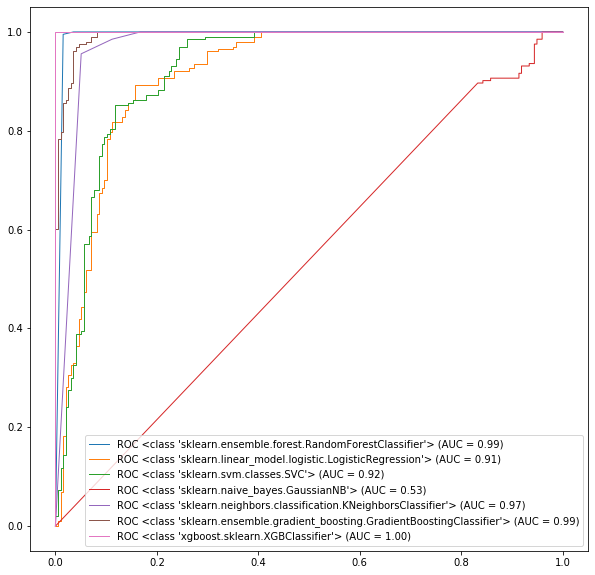

In [14]:
def draw_roc_curve(clf):
    from scipy import interp
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    probas_ = clf.predict_proba(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1,
             
    label='ROC %s (AUC = %0.2f)' % (clf.__class__,roc_auc))
    plt.legend()
    
plt.figure(figsize=(10,10))

clfs = [rf_clf,logistic_clf,svc_clf,naive_bayes_clf,knn_clf,gb_clf,xgb_clf]
[draw_roc_curve(clf) for clf in clfs]

In [15]:
sample = pd.read_csv('bankruptcy_sample_submission.csv')
submission = sample.copy()
submission['class'] = xgb_clf.predict_proba(test_data.iloc[:,1:])[:,1]

In [16]:
submission.to_csv('test10101.csv',index=False)

In [21]:
test345=pd.read_csv('345.csv')
compare=pd.merge(test345,submission,on='ID')
compare['differ']=(compare['class_x']-compare['class_y'])/compare['class_x']
averagediff=sum(compare['differ'])/5000
print(averagediff)

-3.947409735051941


#balance with SMOTE

In [195]:
from imblearn.over_sampling import SMOTE

In [208]:
sm = SMOTE(random_state=511)
X_smot, y_smot = sm.fit_resample(X,y)
X_smot = pd.DataFrame(X_smot)
X_smot.columns = test_data.columns

In [209]:
from sklearn.model_selection import train_test_split

from sklearn import metrics

# Train test splits
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_smot,y_smot,test_size=0.2,random_state=511)

In [210]:
xgb2_clf = XGBClassifier(max_depth=10)

In [211]:
def prediction1(clf):
    print("\n")
    print("for ", clf.__class__)
    clf.fit(X_train1,y_train1)

    print("train_accuracy:",clf.score(X_train1,y_train1))
    print("test_accuracy:",clf.score(X_test1,y_test1))

    print("f1_score:",metrics.f1_score(y_test1, clf.predict(X_test1)))
    print("recall score:",metrics.recall_score(y_test1, clf.predict(X_test1)))
    
    
    probas_ = clf.predict_proba(X_test1)
    fpr, tpr, thresholds = metrics.roc_curve(y_test1, probas_[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    print("auc: ", roc_auc)
    
    return clf

In [212]:
xgb2_prd = prediction1(xgb2_clf)



for  <class 'xgboost.sklearn.XGBClassifier'>
train_accuracy: 1.0
test_accuracy: 0.9948901379662749
f1_score: 0.9948293691830403
recall score: 0.9989615784008308
auc:  0.999946198478514


In [213]:
xgb2_clf.feature_importances_

array([0.00427999, 0.01194598, 0.00820464, 0.00671412, 0.02348255,
       0.03263186, 0.00748113, 0.00499848, 0.03734585, 0.00087121,
       0.00839273, 0.00947479, 0.01861777, 0.00047876, 0.00470702,
       0.00796144, 0.01121901, 0.00561574, 0.01095759, 0.00692802,
       0.00364436, 0.01317372, 0.0111014 , 0.01308127, 0.00665057,
       0.220649  , 0.01459238, 0.0051482 , 0.01119592, 0.00598894,
       0.0101919 , 0.00792616, 0.0086238 , 0.17093147, 0.00851897,
       0.00737007, 0.01337902, 0.0093663 , 0.01408897, 0.00579944,
       0.01560327, 0.01007955, 0.00547429, 0.00650623, 0.00594643,
       0.00855454, 0.00586522, 0.00854817, 0.01621561, 0.01411816,
       0.01187918, 0.00926164, 0.00809046, 0.00636533, 0.00772535,
       0.00755946, 0.00422559, 0.01402047, 0.00952615, 0.00823052,
       0.01039649, 0.00979464, 0.00315369, 0.009129  ], dtype=float32)

In [214]:
ind = np.argpartition(xgb2_clf.feature_importances_, -50)[-50:]
#np.argpartition?
ind

array([29, 43, 53, 24,  6, 19,  3, 35, 54, 55, 31, 25, 26, 23, 28, 22, 30,
        1, 32, 33, 34, 21, 36, 37, 38, 18, 40, 41, 16, 15, 12, 45, 11, 47,
       48, 49, 50, 51, 52, 10,  8,  5,  4, 57, 58, 59, 60, 61,  2, 63],
      dtype=int64)

In [185]:
xgb2_clf.feature_importances_

array([0.00427999, 0.01194598, 0.00820464, 0.00671412, 0.02348255,
       0.03263186, 0.00748113, 0.00499848, 0.03734585, 0.00087121,
       0.00839273, 0.00947479, 0.01861777, 0.00047876, 0.00470702,
       0.00796144, 0.01121901, 0.00561574, 0.01095759, 0.00692802,
       0.00364436, 0.01317372, 0.0111014 , 0.01308127, 0.00665057,
       0.220649  , 0.01459238, 0.0051482 , 0.01119592, 0.00598894,
       0.0101919 , 0.00792616, 0.0086238 , 0.17093147, 0.00851897,
       0.00737007, 0.01337902, 0.0093663 , 0.01408897, 0.00579944,
       0.01560327, 0.01007955, 0.00547429, 0.00650623, 0.00594643,
       0.00855454, 0.00586522, 0.00854817, 0.01621561, 0.01411816,
       0.01187918, 0.00926164, 0.00809046, 0.00636533, 0.00772535,
       0.00755946, 0.00422559, 0.01402047, 0.00952615, 0.00823052,
       0.01039649, 0.00979464, 0.00315369, 0.009129  ], dtype=float32)

In [215]:
# n largest
inds = np.argpartition(xgb2_clf.feature_importances_, -60)[-60:]
inds

array([56,  0, 17,  7, 42, 27, 14, 39, 46, 44, 53, 43, 54,  6, 55, 19,  3,
       35, 29, 24, 31, 25, 26, 23, 28, 22, 30,  1, 32, 33, 34, 21, 36, 37,
       38, 18, 40, 41, 16, 15, 12, 45, 11, 47, 48, 49, 50, 51, 52, 10,  8,
        5,  4, 57, 58, 59, 60, 61,  2, 63], dtype=int64)

In [216]:
X_tr2 = X_smot.iloc[:,inds]
y_tr2 = y_smot
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_tr2,y_tr2,test_size=0.2,random_state=511)

In [218]:
def prediction2(clf):
    print("\n")
    print("for ", clf.__class__)
    clf.fit(X_train2,y_train2)

    print("train_accuracy:",clf.score(X_train2,y_train2))
    print("test_accuracy:",clf.score(X_test2,y_test2))

    print("f1_score:",metrics.f1_score(y_test2, clf.predict(X_test2)))
    print("recall score:",metrics.recall_score(y_test2, clf.predict(X_test2)))
    
    
    probas_ = clf.predict_proba(X_test2)
    fpr, tpr, thresholds = metrics.roc_curve(y_test2, probas_[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    print("auc: ", roc_auc)
    
    return clf

In [219]:
xgbtr2_prd = prediction2(xgb2_clf)



for  <class 'xgboost.sklearn.XGBClassifier'>
train_accuracy: 1.0
test_accuracy: 0.9951456310679612
f1_score: 0.9950866304628913
recall score: 0.9989615784008308
auc:  0.9999216482696803


In [220]:
sample = pd.read_csv('bankruptcy_sample_submission.csv')
submission = sample.copy()
submission['class'] = xgb2_clf.predict_proba(test_data.iloc[:,inds])[:,1]
# submission['class'] = xgb_clf.predict_proba(test_data)[:,1]
rrrr=pd.read_csv('rrrr.csv')
compare=pd.merge(rrrr,submission,on='ID')
compare['differ']=(compare['class_x']-compare['class_y'])/compare['class_x']
averagediff=sum(compare['differ'])/5000
print(averagediff)

0.14366935052613639


In [221]:
submission.to_csv('test101up2.csv',index=False)